In [9]:
import keras
from keras.layers import Flatten,Dense,Dropout,Embedding

import os
import matplotlib.pyplot as plt

path_main='../aclImdb/aclImdb'
train_path=os.path.join(path_main,'train')
test_path=os.path.join(path_main,'test')
print(train_path)

../aclImdb/aclImdb/train


In [10]:
labels=[]
texts=[]

In [17]:

for dir_ in ['neg','pos']:
    path_file=os.path.join(train_path,dir_)
    file_list=os.listdir(path_file)
    for i,file_ in enumerate(file_list):
        if(file_[-4:]=='.txt'):
            #print(file_)
            path_files_train=os.path.join(path_file,file_)
            f=open(path_files_train)
            texts.append(f.read())
#             if(i==0):
#                 print(texts)
            f.close()
            if(dir_=='neg'):
                labels.append(0)
            else:
                labels.append(1)

# ['I thought the movie was a poor documentary. Nothing of substance was discussed. 
#  It seemed to cheapen the ideas and did not provide anything new. The film lacked wonder or romance 
#  or anything that would really drive one to science. Most scientists appeared "stereotyped" and sometimes weird.
#  A woman said that her awards didn\'t matter a whole lot, only children that were helped. She said that after a
#  10 minute scene where she explained all her awards. Playing "humble scientist", are we? "I have equations dancing
#  in my head," another said. I don\'t see how that explains anything to us. It hasn\'t covered significant effects
#  of science on our culture. Politics of science were barely touched.<br /><br />Not a bad flick for a 10-14 
#  year-olds. Other than that, I felt it was boring and unrevealing.<br /><br />4/10']                
                
                

In [18]:
len(texts)

50000

In [19]:
len(labels)

50000

In [38]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len=100
train_sample=20000
eval_sample=2000
max_vocab=10000

tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(texts)  #full text, all revies, expect to get index per revire, split ...

In [39]:
sequences=tokenizer.texts_to_sequences(texts)  # index

In [34]:
len(sequences[0])

139

In [54]:
print(sequences[0])

[10, 194, 1, 17, 13, 3, 335, 659, 161, 4, 2321, 13, 6985, 9, 465, 5, 1, 1005, 2, 119, 21, 1751, 229, 159, 1, 19, 3657, 591, 39, 880, 39, 229, 12, 59, 63, 1275, 28, 5, 1063, 88, 3348, 1478, 7476, 2, 515, 911, 3, 252, 298, 12, 38, 2124, 158, 548, 3, 223, 173, 61, 473, 12, 68, 1670, 56, 298, 12, 100, 3, 155, 783, 133, 118, 56, 1848, 29, 38, 2124, 392, 4483, 1650, 23, 72, 10, 25, 1100, 8, 58, 416, 157, 298, 10, 89, 64, 86, 12, 2553, 229, 5, 175, 9, 1479, 2373, 2665, 299, 4, 1063, 20, 260, 1177, 2410, 4, 1063, 68, 1196, 2837, 7, 7, 21, 3, 75, 506, 15, 3, 155, 2425, 288, 6792, 82, 71, 12, 10, 417, 9, 13, 354, 2, 7, 7, 467, 155]


In [55]:
print(texts[0])

I thought the movie was a poor documentary. Nothing of substance was discussed. It seemed to cheapen the ideas and did not provide anything new. The film lacked wonder or romance or anything that would really drive one to science. Most scientists appeared "stereotyped" and sometimes weird. A woman said that her awards didn't matter a whole lot, only children that were helped. She said that after a 10 minute scene where she explained all her awards. Playing "humble scientist", are we? "I have equations dancing in my head," another said. I don't see how that explains anything to us. It hasn't covered significant effects of science on our culture. Politics of science were barely touched.<br /><br />Not a bad flick for a 10-14 year-olds. Other than that, I felt it was boring and unrevealing.<br /><br />4/10


In [56]:
tokenizer.word_index['i']

10

In [45]:
#(tokenizer.word_counts)


# OrderedDict([('i', 154284),
#              ('thought', 6862),
#              ('the', 672296),
#              ('movie', 87128),
#              ('was', 96390),
#              ('a', 326080),
#              ('poor', 3792),
#              ('documentary', 1890),
#              ('nothing', 8544),
#              ('of', 291694),
#              ('substance', 438),
#              ('discussed', 104),

In [47]:
# tokenizer.word_docs


# {'have': 28370,
#  'see': 16166,
#  'or': 20676,
#  'year': 3784,
#  'movie': 30460,
#  'romance': 1192,
#  'drive': 788,
#  'documentary': 1238,
#  'sometimes': 2080,

In [49]:
tokenizer.word_docs['the']  #gives you count, howmany time happen across text

49586

In [51]:
tokenizer.word_docs['and']

48328

In [50]:
tokenizer.word_index['the'] #this gives you rank, highr count earlier rank

1

In [52]:
tokenizer.word_index['and']

2

In [53]:
# tokenizer.word_index  #index is 1 for 'the' since this is rank in frequency


# {'the': 1,
#  'and': 2,
#  'a': 3,
#  'of': 4,
#  'to': 5,
#  'is': 6,
#  'br': 7,
#  'in': 8,
#  'it': 9,
#  'i': 10,
#  'this': 11,

In [57]:
word_to_index=tokenizer.word_index

In [116]:
len(word_to_index)

88582

In [58]:
data=pad_sequences(sequences,maxlen=max_len)

In [59]:
data[0]  #'pre' from back of array

array([  88, 3348, 1478, 7476,    2,  515,  911,    3,  252,  298,   12,
         38, 2124,  158,  548,    3,  223,  173,   61,  473,   12,   68,
       1670,   56,  298,   12,  100,    3,  155,  783,  133,  118,   56,
       1848,   29,   38, 2124,  392, 4483, 1650,   23,   72,   10,   25,
       1100,    8,   58,  416,  157,  298,   10,   89,   64,   86,   12,
       2553,  229,    5,  175,    9, 1479, 2373, 2665,  299,    4, 1063,
         20,  260, 1177, 2410,    4, 1063,   68, 1196, 2837,    7,    7,
         21,    3,   75,  506,   15,    3,  155, 2425,  288, 6792,   82,
         71,   12,   10,  417,    9,   13,  354,    2,    7,    7,  467,
        155], dtype=int32)

In [60]:
len(data)

50000

In [64]:
import numpy as np
labels=np.asarray(labels)

In [66]:
labels.shape

(50000,)

In [67]:
data.shape

(50000, 100)

In [72]:
index=np.random.choice(np.array(50000),50000)  #mixing /shuffling data

In [73]:
datanew=data[index]
labelsnew=labels[index]

In [74]:
datanew.shape

(50000, 100)

In [75]:
labelsnew.shape

(50000,)

In [76]:
x_train=datanew[:train_sample]
x_eval=datanew[train_sample:train_sample+eval_sample]

labels_train=labelsnew[:train_sample]
labels_eval=labelsnew[train_sample:train_sample+eval_sample]

In [83]:
labels_eval[0:50]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0])

In [89]:
glove_dir='../glove.6B'

embedding_index={}
path_glove_file=os.path.join(glove_dir,'glove.6B.100d.txt')  #100 size vector

f=open(path_glove_file)

for line in f:   #line by line
    
    line_=line.split()
    word_=line_[0]
    coefs=np.asarray(line_[1:],dtype='float32')
    embedding_index[word_]=coefs
    
f.close()    
    
                              

In [111]:
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
embedding_index['good'].shape

(100,)

In [101]:
len(embedding_index)


400000

In [115]:
from scipy import spatial

dataSetI = embedding_index['fork'].reshape(-1, 1)
dataSetII = embedding_index['knife'].reshape(-1, 1)
result = spatial.distance.cosine(dataSetI, dataSetII)
print(result)

0.5559101104736328


In [110]:
result

1.0

In [118]:
embedding_dim=100  # vector size 100

embedding_matrix=np.zeros((max_vocab,embedding_dim))


for word_,index_ in word_to_index.items():  #from imdb vocabulary
    
    if(index_<max_vocab):
        
        embedding_vector=embedding_index.get(word_)
        if embedding_vector is not None:
            embedding_matrix[index_]=embedding_vector  #embedding index  400000 of 100 len vec in dict

In [123]:
embedding_matrix.shape   #embedding weight shape matrix

(10000, 100)

In [127]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [152]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding,Dropout


model=Sequential()   #10000 * 100
model.add(Embedding(max_vocab,embedding_dim,input_length=max_len)) #dense layer 100 => sample * max_len*8
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________


In [153]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.24462   , -0.28867999, -0.27638   , ..., -0.080172  ,
        -0.237     , -0.14956   ],
       [-0.29734999,  0.66285002,  0.079917  , ..., -0.90907001,
         0.61360002, -0.052395  ],
       [-0.021031  , -0.039257  , -0.74848002, ..., -0.94312   ,
        -1.00370002, -0.68343002]])

In [154]:
embedding_matrix.shape

(10000, 100)

In [155]:
model.layers[0].get_weights()

[array([[-0.00512026,  0.02747351, -0.03335508, ..., -0.02873565,
          0.02019973,  0.01249385],
        [-0.01669018, -0.04222324, -0.03009282, ...,  0.02154363,
          0.00823496, -0.04262137],
        [-0.04781811,  0.04094717, -0.01652296, ..., -0.03378069,
          0.04653471, -0.02623366],
        ...,
        [-0.0390599 ,  0.03401294,  0.0028873 , ...,  0.00967674,
          0.03287056, -0.04858071],
        [ 0.02172389,  0.00594155,  0.02693871, ...,  0.02571681,
         -0.0209727 , -0.04203793],
        [ 0.04792562, -0.04363277, -0.0378554 , ..., -0.00432465,
         -0.0483672 ,  0.02090602]], dtype=float32)]

In [156]:
model.layers[0].set_weights([embedding_matrix])

In [157]:
model.layers[0].trainable=False

In [158]:
model.layers[0].get_weights()

[array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [-0.038194, -0.24487 ,  0.72812 , ..., -0.1459  ,  0.8278  ,
          0.27062 ],
        [-0.071953,  0.23127 ,  0.023731, ..., -0.71895 ,  0.86894 ,
          0.19539 ],
        ...,
        [-0.24462 , -0.28868 , -0.27638 , ..., -0.080172, -0.237   ,
         -0.14956 ],
        [-0.29735 ,  0.66285 ,  0.079917, ..., -0.90907 ,  0.6136  ,
         -0.052395],
        [-0.021031, -0.039257, -0.74848 , ..., -0.94312 , -1.0037  ,
         -0.68343 ]], dtype=float32)]

In [142]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [143]:
history=model.fit(x_train,labels_train,epochs=10,batch_size=32,validation_data=(x_eval,labels_eval))

Train on 20000 samples, validate on 2000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 801us/step - loss: 0.6767 - acc: 0.5614 - val_loss: 0.6392 - val_acc: 0.6790
Epoch 2/10
20000/20000 [==============================] - 17s 844us/step - loss: 0.6228 - acc: 0.6346 - val_loss: 0.5971 - val_acc: 0.6945
Epoch 3/10
20000/20000 [==============================] - 17s 838us/step - loss: 0.5955 - acc: 0.6597 - val_loss: 0.5513 - val_acc: 0.7385
Epoch 4/10
20000/20000 [==============================] - 18s 877us/step - loss: 0.5804 - acc: 0.6765 - val_loss: 0.5156 - val_acc: 0.7560
Epoch 5/10
20000/20000 [==============================] - 17s 868us/step - loss: 0.5598 - acc: 0.6970 - val_loss: 0.5296 - val_acc: 0.7580
Epoch 6/10
20000/20000 [==============================] - 18s 900us/step - loss: 0.5473 - acc: 0.7070 - val_loss: 0.5355 - val_acc: 0.7705
Epoch 7/10
20000/20000 [==============================] - 18s 911us/step - loss: 0.5413 - acc: 0.7081 - val_loss: 0.5

In [144]:
model.evaluate(x_eval,labels_eval)

2000/2000 [==============================] - 0s 136us/step


[0.4967513618469238, 0.7715]

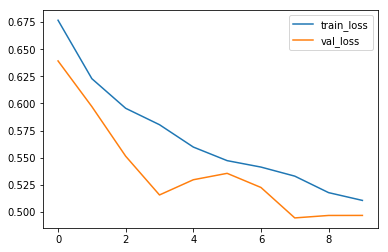

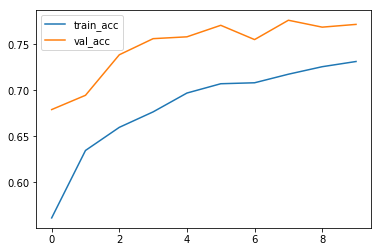

In [145]:
import matplotlib.pyplot as plt
import numpy  as np
list_epoch=np.arange(0,10)
plt.plot(list_epoch,history.history['loss'])

plt.plot(list_epoch,history.history['val_loss'])

plt.legend(['train_loss','val_loss'])
plt.show()


plt.plot(list_epoch,history.history['acc'])

plt.plot(list_epoch,history.history['val_acc'])
plt.legend(['train_acc','val_acc'])
plt.show()

In [147]:
texts=[]
labels=[]

for dir_ in ['neg','pos']:
    path_file=os.path.join(test_path,dir_)
    file_list=os.listdir(path_file)
    for i,file_ in enumerate(file_list):
        if(file_[-4:]=='.txt'):
            #print(file_)
            path_files_train=os.path.join(path_file,file_)
            f=open(path_files_train)
            texts.append(f.read())
#             if(i==0):
#                 print(texts)
            f.close()
            if(dir_=='neg'):
                labels.append(0)
            else:
                labels.append(1)
                
                
sequences=tokenizer.texts_to_sequences(texts)    #use fit from train      

x_test=pad_sequences(sequences,maxlen=max_len)
test_labels=np.asarray(labels)

In [148]:
model.evaluate(x_test,test_labels)

25000/25000 [==============================] - 4s 150us/step


[0.5772711224746704, 0.68688]